<a href="https://colab.research.google.com/github/SamikshaSolanke/Fraud-Detection-Using-Machine-Learning/blob/main/Fraud_Detection_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection Using Machine Learning**
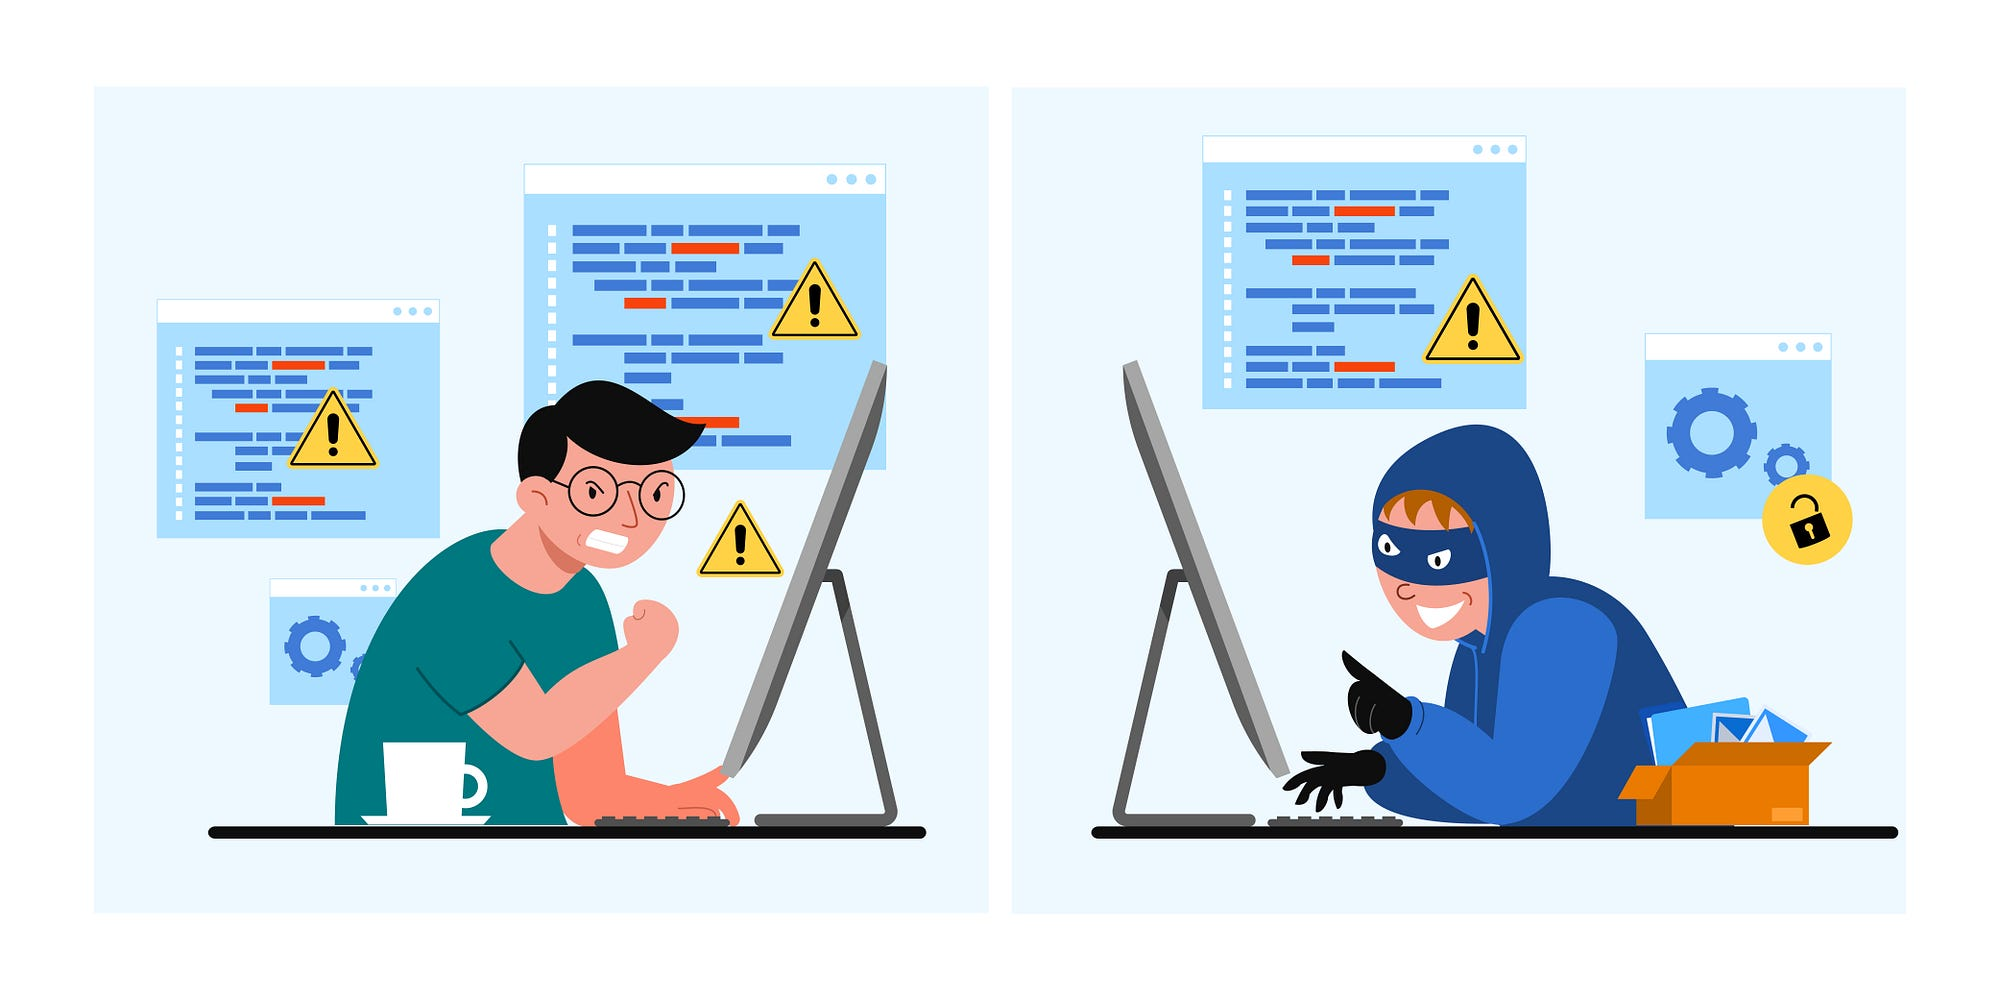
<p>This project explores the development and implementation of machine learning models for detecting fraudulent activities in various domains, such as financial transactions, insurance claims, and e-commerce. This project provides a comprehensive framework for building, training, and evaluating fraud detection models, including data preprocessing, feature engineering, model selection, and performance evaluation.</p>


**WORKFLOW**
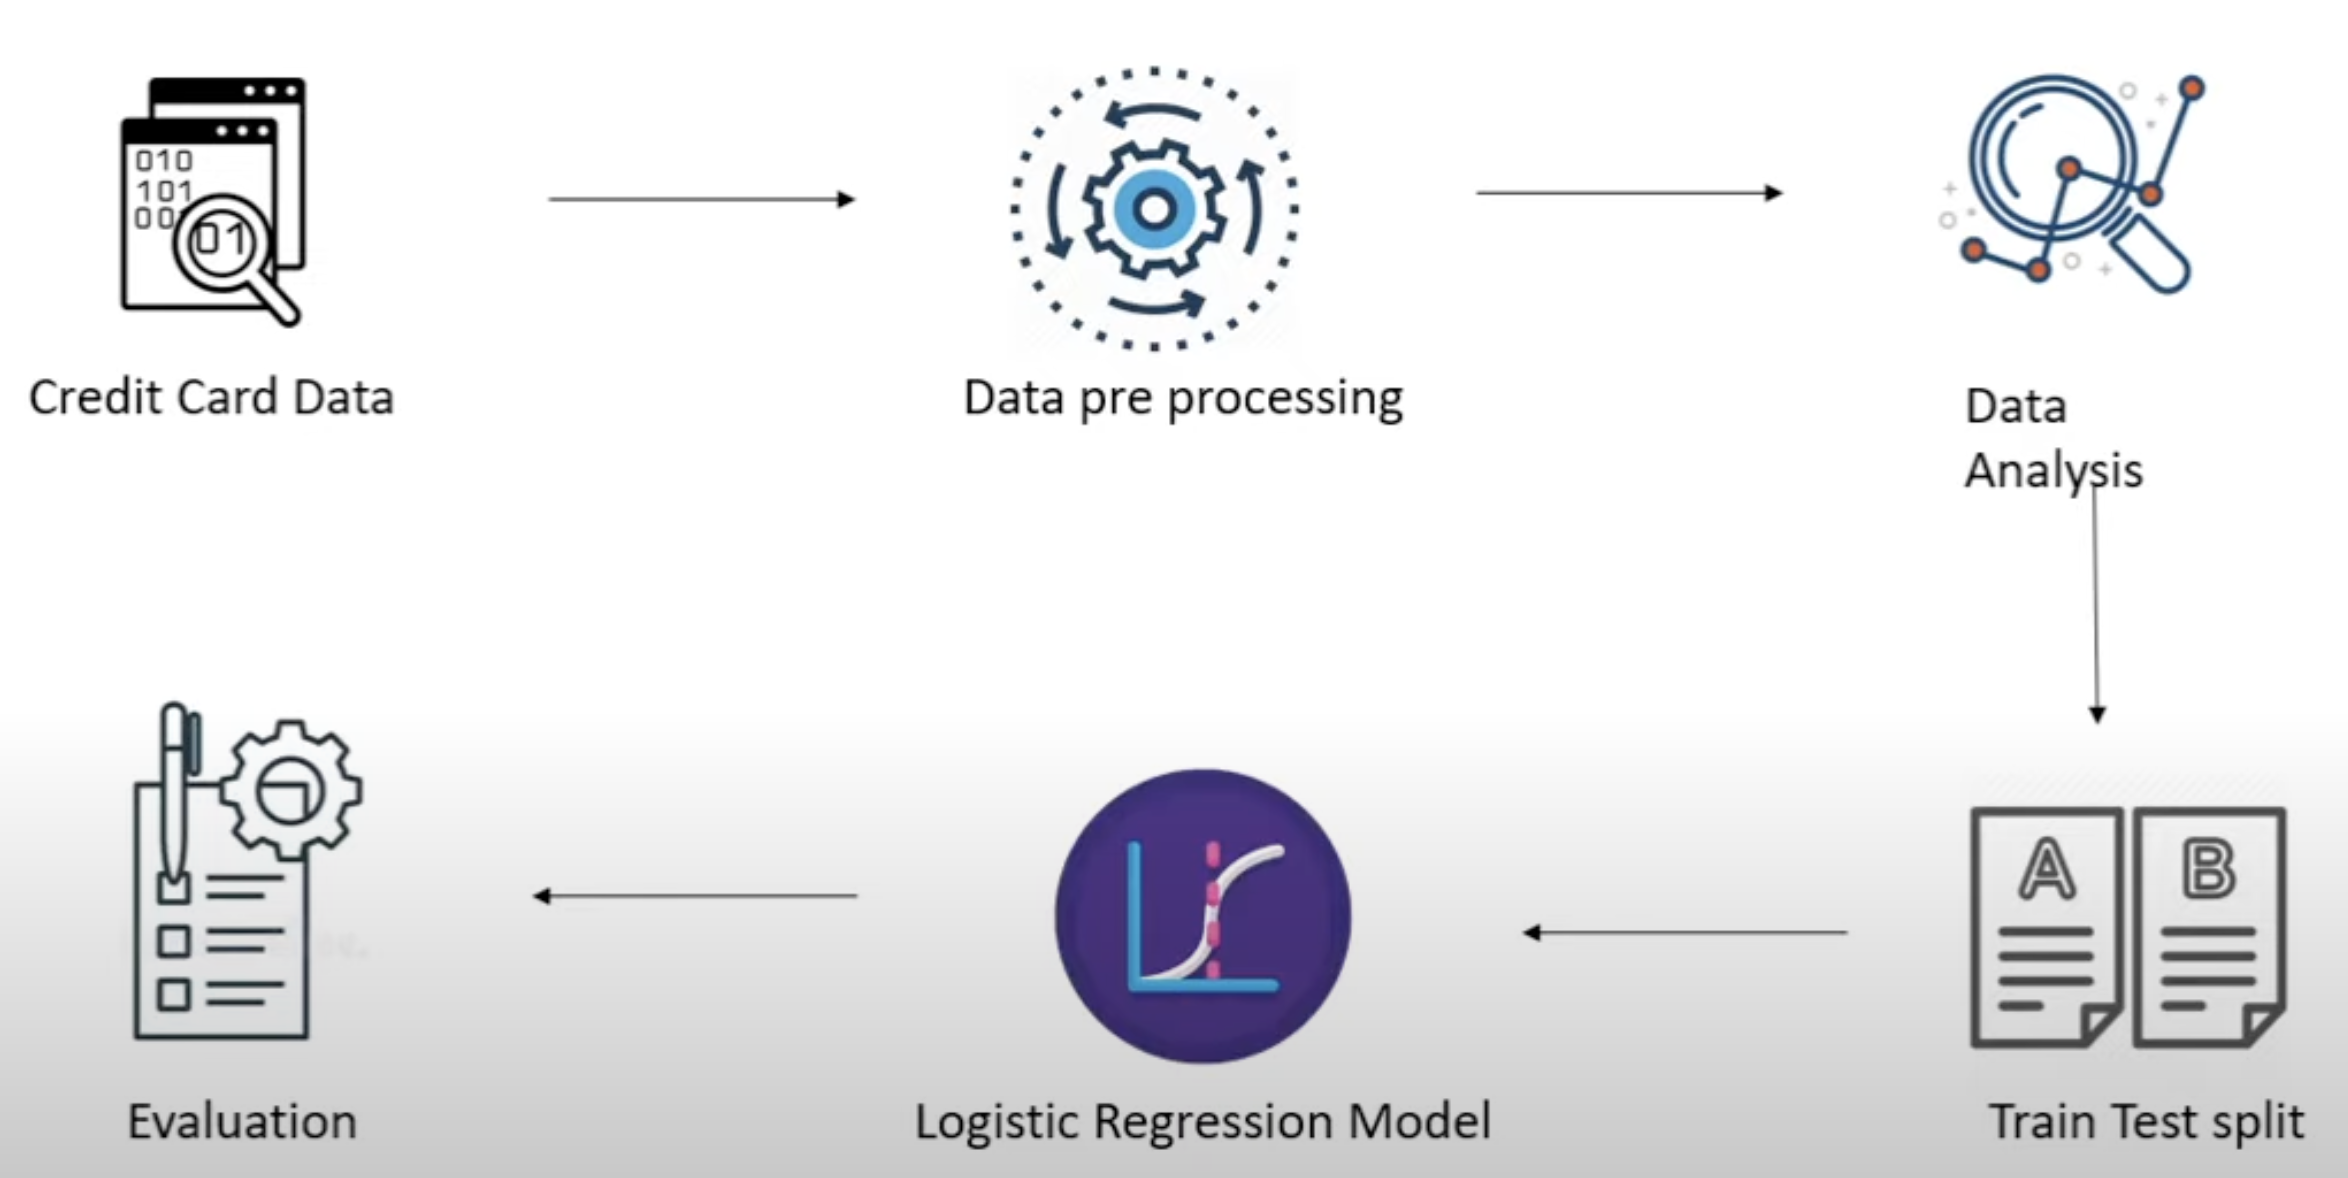

Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the dataset to pandas dataframe

In [7]:
df = pd.read_csv('/content/Projects/Fraud_Detection_Using_ML/creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**DATASET INFORMATION**
<BR>
Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.
<br>
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
<br>
Time represents the Number of seconds elapsed between this transaction and the first transaction in the dataset.
<br>
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
<br>
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Here '1' represents **Fraudulent Transaction** and '0' represents **Normal Transaction**

In [13]:
#seperating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [15]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [16]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [18]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling**
<br>
Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
<br>
Number of Fraudulent Transactions --> 492

In [19]:
legit_sample = legit.sample(n=492)

Basically, now we are going to create a sample dataset where there will be equal amount of random fraudulent and normal dataset.

Concatenating two DataFrames

In [20]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204251,135190.0,-2.635214,2.734944,-1.928261,-1.098438,0.511143,-0.156139,0.432094,0.232112,1.579751,1.863917,0.343666,0.750197,0.310883,-1.735743,-1.594195,0.088390,0.186620,0.632522,0.101550,0.542706,0.063966,0.717130,0.002844,0.147554,-0.798119,0.222588,-1.136345,-0.446411,1.54,0
154501,101754.0,-1.162206,1.528817,-0.147113,-0.887980,-0.063026,0.124940,-0.642277,1.203944,1.703475,-1.622827,0.942479,-2.680929,0.118664,1.001376,-0.812163,1.303773,1.005864,1.653323,-0.050032,-0.148142,-0.391917,-1.042681,0.038433,-0.158919,-0.073593,-0.291616,0.095068,0.023809,0.85,0
50682,44601.0,0.996815,-0.027929,0.322875,1.054738,-0.341402,-0.371956,0.099928,0.147172,-0.076601,0.125324,1.479902,0.044523,-2.271148,1.137164,0.644422,0.065602,-0.170170,-0.442858,-0.244751,-0.164265,-0.360894,-1.355620,0.229074,0.083964,0.028544,-0.852939,-0.001948,0.025603,76.17,0
256963,157935.0,2.006765,-0.710238,-0.755294,-1.626403,-0.625136,-0.546716,-0.572969,0.022263,1.811971,-0.801282,1.178187,1.602663,0.177795,0.193882,0.505732,-0.179787,-0.560711,0.254741,1.072505,-0.124508,-0.170967,-0.367460,0.389125,0.752547,-0.430054,-0.617595,0.016930,-0.039018,15.88,0
225809,144407.0,-9.230079,8.010768,-7.476914,-0.942063,-5.085235,-2.009370,-4.612946,6.503395,0.882219,2.391788,-0.979716,3.002930,0.319999,4.128097,-0.458311,1.119890,1.748827,0.863788,-0.415600,0.718850,0.486035,0.883346,0.965032,-0.046465,0.488376,-0.111546,0.644638,0.512127,17.99,0


In [22]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [24]:
new_df['Class'].value_counts()

,count
Class,
0,492
1,492


In [25]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91815.997967,0.082705,-0.103418,0.017193,0.052786,-0.068247,-0.024103,-0.012476,0.013059,0.043158,0.054160,0.032189,-0.044931,-0.000683,0.061516,0.078320,0.019487,0.021492,-0.019528,0.006930,-0.025545,0.004344,0.005769,-0.062932,0.014084,0.014110,-0.003573,-0.024911,0.009171,96.192114
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Target

In [28]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [29]:
print(X)

            Time        V1        V2        V3  ...       V26       V27       V28  Amount
204251  135190.0 -2.635214  2.734944 -1.928261  ...  0.222588 -1.136345 -0.446411    1.54
154501  101754.0 -1.162206  1.528817 -0.147113  ... -0.291616  0.095068  0.023809    0.85
50682    44601.0  0.996815 -0.027929  0.322875  ... -0.852939 -0.001948  0.025603   76.17
256963  157935.0  2.006765 -0.710238 -0.755294  ... -0.617595  0.016930 -0.039018   15.88
225809  144407.0 -9.230079  8.010768 -7.476914  ... -0.111546  0.644638  0.512127   17.99
...          ...       ...       ...       ...  ...       ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653 -4.518331  ...  0.788395  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381 -5.004247  ...  0.739467  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366 -2.213700  ...  0.471111  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864 -5.399730  ...  0.606116  0.884876 -0.253700  245.00
281674  17

In [30]:
print(Y)

204251    0
154501    0
50682     0
256963    0
225809    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training and testing data

In [31]:
from typing import Any
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2, stratify= Y, random_state = 2)

**MODEL TRAINING**
<br>
Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9744897959183674


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9213197969543148
